# Problem Statement


### The goal of this project is to develop a machine learning model that predicts the total fare for taxi rides based on various factors such as trip duration, distance traveled, number of passengers,tips received, miscellaneous fees, and surge pricing.

### Business Understanding

In the realm of taxi services, business users rely on data to optimize pricing strategies and enhance the customer experience. By leveraging the prediction of the total fare based on certain columns, they can make informed decisions. Here's how they utilize the following factors:

1)Trip Duration: Analyzing the duration of each journey provides insights into peak hours and demand patterns. Business users can adjust prices accordingly, offering discounts during slower times and maximizing revenue during busy periods.

2)Distance Traveled: Understanding the distance covered by each taxi ride helps estimate fuel consumption and maintenance costs. By optimizing pricing based on distance, taxi companies can ensure profitability while remaining competitive.

3)Number of Passengers: Recognizing the number of passengers in each ride is crucial for optimizing capacity utilization. Business users can adjust pricing based on group sizes, offering discounts for larger groups or providing premium services for solo travelers.

4)Tips Received: Tips indicate customer satisfaction and driver performance. Business users analyze tipping patterns to identify areas for improvement and incentivize drivers to provide exceptional service.

5)Miscellaneous Fees: Additional charges, such as toll fees or extra services, impact the overall fare structure. Business users track these fees to refine pricing models and ensure transparency in fare calculations.

6)Surge Pricing: Surge pricing, triggered by high demand, allows businesses to adjust prices accordingly. By predicting surge periods and applying surge pricing when needed, business users can balance revenue maximization with customer satisfaction.

By leveraging the prediction of the total fare and considering these factors, business users can optimize pricing strategies, attract customers, and create a positive customer experience. Their goal is to strike a balance between profitability and providing value to passengers in the competitive taxi industry.

In [180]:
# importing necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [181]:
import warnings
warnings.filterwarnings("ignore")


In [182]:
df=pd.read_csv('train.csv')

In [183]:
# check number of rows and columns
df.shape

(209673, 7)

In [184]:
#displaying first few rows to check the headers and entries 
df.head()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare,surge_applied
0,748,2.75,1,24,6.300,105.300,0
1,1187,3.43,1,24,13.200,142.200,0
2,730,3.12,1,0,26.625,97.875,1
3,671,5.63,3,0,9.750,99.750,0
4,329,2.09,1,12,13.200,70.200,0


In [185]:
# reading tail for any junk values 
df.tail()



,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare,surge_applied
209668,1617,8.42,1,47,5.800,202.800,0
209669,438,1.29,1,12,34.575,95.325,1
209670,571,2.82,1,0,6.000,69.750,0
209671,491,2.16,1,0,13.500,69.750,0
209672,3614,33.72,1,0,2.250,339.750,0


In [186]:
# check for missinmg values of each column 
df.isna().sum()
# there are no null values 

trip_duration         0
distance_traveled     0
num_of_passengers     0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [187]:
# even though there are no null values in the dataset , when digged in deep , we found that 
# Label has some zero values , equivalent of null in different form , hence we will drop them 
#dropping the cabin column 
df = df[df['total_fare'] != 0]


In [188]:
# check the data types of the columns 
df.dtypes 

trip_duration           int64
distance_traveled     float64
num_of_passengers       int64
tip                     int64
miscellaneous_fees    float64
total_fare            float64
surge_applied           int64
dtype: object

In [189]:
df.sample(5)

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare,surge_applied
104746,1727,6.55,1,22,27.125,199.125,1
185251,376,1.61,1,15,9.750,69.750,0
60190,1238,4.88,1,29,34.450,175.950,1
200509,890,4.18,1,15,26.625,127.875,1
65326,152,0.80,2,8,5.500,43.500,0


In [190]:
# five point summary of numerical columns 
df.describe()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare,surge_applied
count,209544.000000,209544.000000,209544.000000,209544.000000,209544.000000,209544.000000,209544.000000
mean,1172.611313,5.051471,1.292898,13.038846,15.146147,127.869755,0.280695
std,4775.899666,125.255326,0.930930,20.371465,12.551678,98.776873,0.449340
min,0.000000,0.020000,0.000000,0.000000,-0.500000,1.125000,0.000000
25%,446.000000,1.950000,1.000000,0.000000,6.000000,70.200000,0.000000
50%,706.000000,3.200000,1.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,2500.000000,435.000000,4472.250000,1.000000


In [191]:
df.shape

(209544, 7)

In [192]:
#handling outliers in trip duration
Q1=np.percentile(df['trip_duration'],25)
Q3=np.percentile(df['trip_duration'],75)
outlier_lower =Q1- 1.5*(Q3-Q1)
outlier_upper =Q3 + 1.5*(Q3-Q1)

df=df[(df['trip_duration']>outlier_lower) & (df['trip_duration']<outlier_upper)]
df.shape

(197661, 7)

In [193]:
#handling outliers in trip distance traveled 
Q1=np.percentile(df['distance_traveled'],25)
Q3=np.percentile(df['distance_traveled'],75)
outlier_lower =Q1- 1.5*(Q3-Q1)
outlier_upper =Q3 + 1.5*(Q3-Q1)

df=df[(df['distance_traveled']>outlier_lower) & (df['distance_traveled']<outlier_upper)]
df.shape

(183098, 7)

In [194]:
# handling outliers in num of passengers
df = df[df['num_of_passengers'] != 0]

In [195]:
df.shape

(182420, 7)

In [196]:
# handling outliers in miscellaneous_fees
df = df[df['miscellaneous_fees'] >= 0]

In [197]:
df.shape

(182397, 7)

In [198]:
#handling outliers in total fare
Q1=np.percentile(df['total_fare'],25)
Q3=np.percentile(df['total_fare'],75)
outlier_lower =Q1- 1.5*(Q3-Q1)
outlier_upper =Q3 + 1.5*(Q3-Q1)

df=df[(df['total_fare']>outlier_lower) & (df['total_fare']<outlier_upper)]
df.shape

(179172, 7)

In [199]:
# five point summary of numerical columns 
df.describe()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare,surge_applied
count,179172.000000,179172.000000,179172.000000,179172.000000,179172.000000,179172.000000,179172.000000
mean,697.291547,3.324853,1.293428,10.414936,13.597944,100.033489,0.254973
std,382.907685,2.047967,0.933577,11.652483,9.836500,41.962330,0.435847
min,0.000000,0.020000,1.000000,0.000000,0.000000,1.125000,0.000000
25%,413.000000,1.800000,1.000000,0.000000,6.000000,66.000000,0.000000
50%,632.000000,2.820000,1.000000,8.000000,9.750000,92.250000,0.000000
75%,913.000000,4.410000,1.000000,18.000000,26.125000,126.450000,1.000000
max,2075.000000,9.960000,9.000000,188.000000,111.750000,223.200000,1.000000


In [200]:
# there are still zero trip duration values in the column , so we will drop those to handle the outliers or wrong entries 
df = df[df['trip_duration'] > 0]

## Univariate Analysis

skewness: 0.8341779823538111
kurtosis: 0.5158731743795344


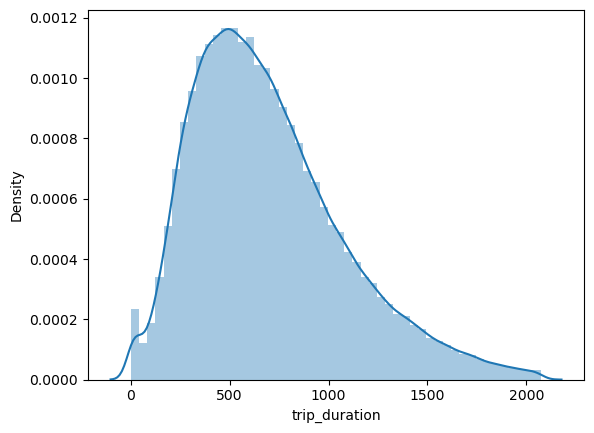

In [201]:
# Analyzing distribution, skewness and kurtosis 
sns.distplot(df['trip_duration'],kde=True)
print("skewness:",df['trip_duration'].skew())
print("kurtosis:",df['trip_duration'].kurt())

The "trip_duration" variable has a slightly positive skewness but is approximately normally distributed with a moderate peak and lighter tails .


In [202]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

skewness: 0.9997693166464613
kurtosis: 0.5393277856177092


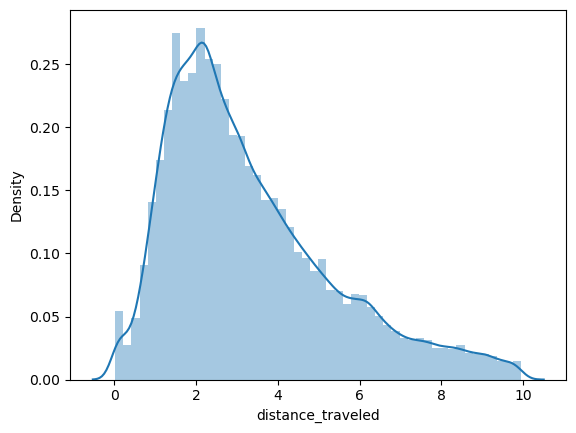

In [203]:
#Analyzing distribution, skewness and kurtosis 
sns.distplot(df['distance_traveled'],kde=True)
print("skewness:",df['distance_traveled'].skew())
print("kurtosis:",df['distance_traveled'].kurt())

The "distance_traveled" variable has a highly positively skewed distribution, indicating that there are a few instances with very large distances traveled. The distribution is approximately normally shaped with a moderate peak.

<AxesSubplot:xlabel='num_of_passengers', ylabel='count'>

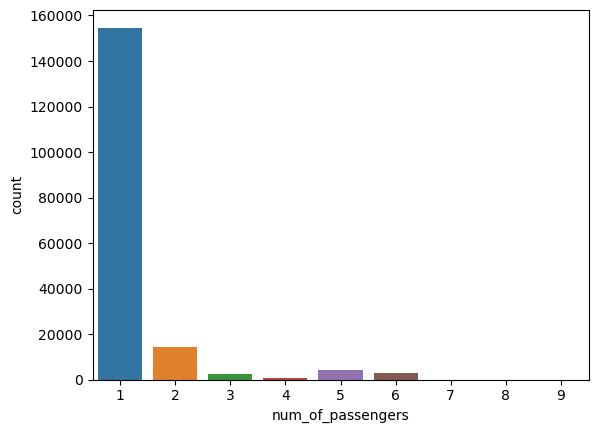

In [204]:
sns.countplot(df['num_of_passengers'])

Maximum of the passengers are Solo travelers 

skewness: 0.6629263456340747
kurtosis: -0.21256165169575203


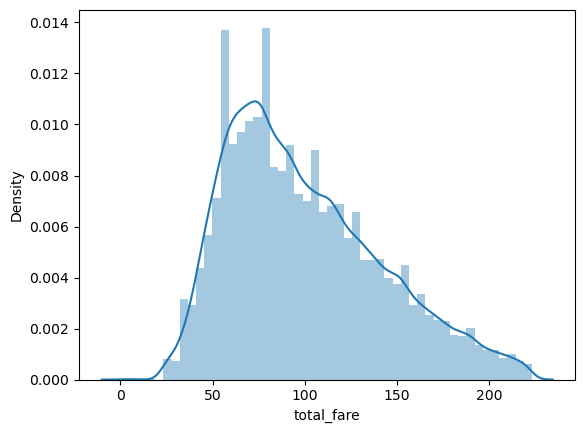

In [205]:
#Analyzing distribution, skewness and kurtosis 
sns.distplot(df['total_fare'],kde=True)
print("skewness:",df['total_fare'].skew())
print("kurtosis:",df['total_fare'].kurt())

The "total_fare" variable has a moderately positively skewed distribution, indicating that there are some instances with higher total fares. The distribution is slightly flatter and has thinner tails compared to a normal distribution.

## Multivariate Analysis

In [206]:
df.sample(5)

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare,surge_applied
73182,752,3.65,1,27,26.925,136.425,1
160414,476,2.20,1,16,13.100,77.850,0
206126,745,3.62,1,25,6.425,110.175,0
187238,568,2.22,1,12,6.450,74.700,0
1737,507,2.57,3,0,13.500,69.750,0


In [207]:
# Correlation matrix and heat map
#trip duration and total_fare scatter plot 
#distance 
# total fare and num of passengers , avgerage price per passengers pivot or cross tab 
#surge applied total fare avg price 

In [208]:
#correlation of features and labels 
df.corr()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.753605,0.004040,0.246438,0.271786,0.829769,0.290882
distance_traveled,0.753605,1.000000,0.005512,0.279746,0.306789,0.849059,0.310142
num_of_passengers,0.004040,0.005512,1.000000,-0.007164,0.006495,0.002200,0.005743
tip,0.246438,0.279746,-0.007164,1.000000,0.321338,0.566400,0.327559
miscellaneous_fees,0.271786,0.306789,0.006495,0.321338,1.000000,0.531103,0.906606
total_fare,0.829769,0.849059,0.002200,0.566400,0.531103,1.000000,0.533144
surge_applied,0.290882,0.310142,0.005743,0.327559,0.906606,0.533144,1.000000


<AxesSubplot:>

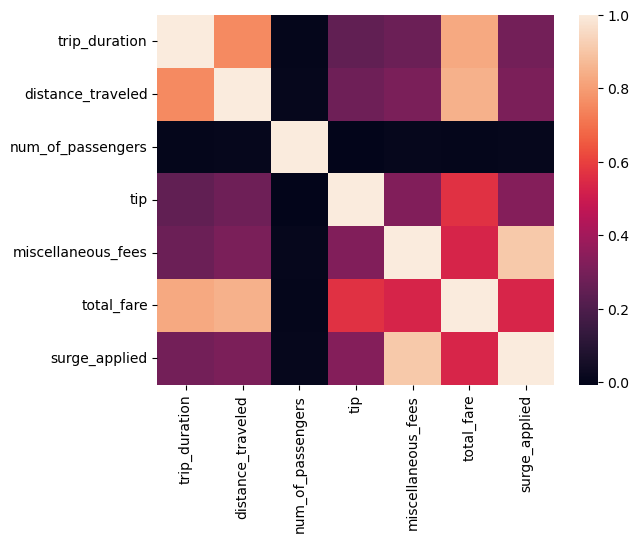

In [209]:
sns.heatmap(df.corr())

In [210]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

<AxesSubplot:xlabel='trip_duration', ylabel='total_fare'>

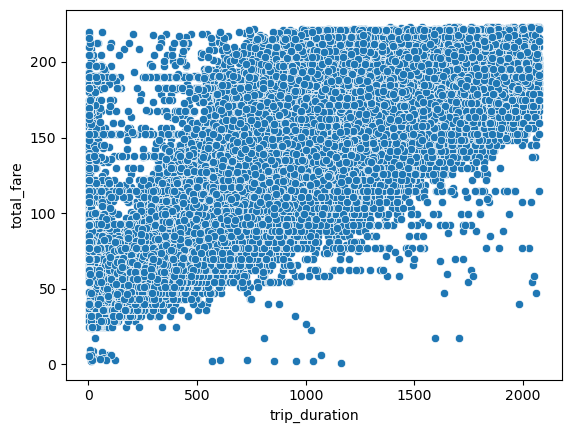

In [211]:
#trip duration and total fare
sns.scatterplot(x=df['trip_duration'],y=df['total_fare'])
# Overall looks like there is a positive correlation between fare and trip duration , but fare is also influenced by various other factors 


<AxesSubplot:xlabel='distance_traveled', ylabel='total_fare'>

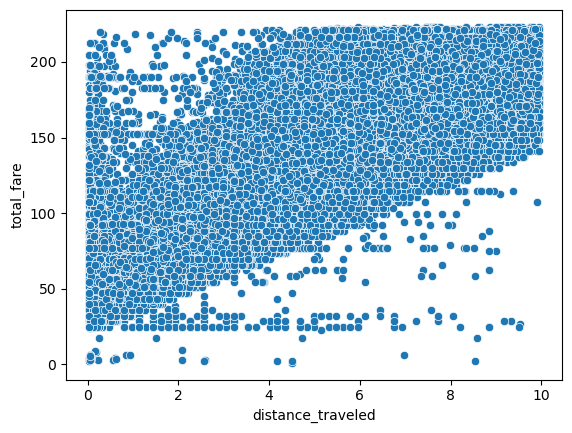

In [212]:
#trip duration and total fare
sns.scatterplot(x=df['distance_traveled'],y=df['total_fare'])
# Overall looks like there is a positive correlation between fare and distance travelled , but fare is also influenced by various other factors 


In [213]:
# no of passengers and total fare 
pd.pivot_table(df,index='num_of_passengers',values='total_fare',aggfunc='mean')
# average fare for different number of passengers 

,total_fare
num_of_passengers,
1,99.925027
2,101.010799
3,99.502622
4,103.799085
5,102.043468
6,98.127543
7,60.000000
8,60.625000
9,70.500000


In [214]:
per_passenger_fare = df['total_fare'] / df['num_of_passengers']
per_passenger_df = pd.DataFrame({'per_passenger_fare': per_passenger_fare, 'num_of_passengers': df['num_of_passengers']})
pd.pivot_table(per_passenger_df, index='num_of_passengers', values='per_passenger_fare', aggfunc='mean')
# we can see from the below table that , per passenger cost decrease as the num of passengers increases

,per_passenger_fare
num_of_passengers,
1,99.925027
2,50.505399
3,33.167541
4,25.949771
5,20.408694
6,16.354591
7,8.571429
8,7.578125
9,7.833333


In [215]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [216]:
# surge apllied  and total fare 
pd.pivot_table(df,index='surge_applied',values='total_fare',aggfunc='mean')
# As we can see from the pivot below , price steeply rises when surge is applied 

,total_fare
surge_applied,
0,86.945530
1,138.272804


# Decision Tree Model fitting process 

### Base model ,GridSearchCV & RandomizedSearchCV models 

In [220]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Splitting the data into features (X) and target (y)
X = df[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip', 'miscellaneous_fees', 'surge_applied']]
y = df['total_fare']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a decision tree without hyperparameter tuning
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Getting the depth and fitted parameters of the final model without tuning
depth_no_tuning = decision_tree.get_depth()
params_no_tuning = decision_tree.get_params()

# Predicting on train and test sets
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Calculating MAPE in terms of percentage for train and test sets
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

# Creating a DataFrame to store the MAPE values
results = pd.DataFrame({'Method': ['Decision Tree (No Tuning)'],
                        'Train MAPE (%)': [train_mape],
                        'Test MAPE (%)': [test_mape],
                        'Depth': [depth_no_tuning],
                        'Fitted Parameters': [params_no_tuning]})

# Defining the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 3, 5, 7],
}


# Performing GridSearchCV
grid_search = GridSearchCV(decision_tree, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the best model from GridSearchCV
best_model_grid = grid_search.best_estimator_
depth_grid = best_model_grid.get_depth()
params_grid = best_model_grid.get_params()

# Predicting on train and test sets using the best model from GridSearchCV
y_train_pred_grid = best_model_grid.predict(X_train)
y_test_pred_grid = best_model_grid.predict(X_test)

# Calculating MAPE in terms of percentage for train and test sets using the best model from GridSearchCV
train_mape_grid = mean_absolute_percentage_error(y_train, y_train_pred_grid) * 100
test_mape_grid = mean_absolute_percentage_error(y_test, y_test_pred_grid) * 100

# Adding the results of GridSearchCV to the DataFrame
results = results.append({'Method': 'Decision Tree (GridSearchCV)',
                          'Train MAPE (%)': train_mape_grid,
                          'Test MAPE (%)': test_mape_grid,
                          'Depth': depth_grid,
                          'Fitted Parameters': params_grid}, ignore_index=True)

# Performing RandomizedSearchCV
randomized_search = RandomizedSearchCV(decision_tree, param_distributions=param_grid, n_iter=10, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)
randomized_search.fit(X_train, y_train)

# Getting the best model from RandomizedSearchCV
best_model_random = randomized_search.best_estimator_
depth_random = best_model_random.get_depth()
params_random = best_model_random.get_params()

# Predicting on train and test sets using the best model from RandomizedSearchCV
y_train_pred_random = best_model_random.predict(X_train)
y_test_pred_random = best_model_random.predict(X_test)

# Calculating MAPE in terms of percentage for train and test sets using the best model from RandomizedSearchCV
train_mape_random = mean_absolute_percentage_error(y_train, y_train_pred_random) * 100
test_mape_random = mean_absolute_percentage_error(y_test, y_test_pred_random) * 100

# Adding the results of RandomizedSearchCV to the DataFrame
results = results.append({'Method': 'Decision Tree (RandomizedSearchCV)',
                          'Train MAPE (%)': train_mape_random,
                          'Test MAPE (%)': test_mape_random,
                          'Depth': depth_random,
                          'Fitted Parameters': params_random}, ignore_index=True)

# Displaying the results
results


,Method,Train MAPE (%),Test MAPE (%),Depth,Fitted Parameters
0,Decision Tree (No Tuning),0.119723,3.234282,37,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
1,Decision Tree (GridSearchCV),1.785259,3.130981,20,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
2,Decision Tree (RandomizedSearchCV),1.785259,3.130981,20,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."


### Inferences 

### Comparing tuning methods 